In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
d=pd.read_csv("/content/Mall_Customers (1).csv")

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
d.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
d.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual_Income_(k$),0
Spending_Score,0


In [ ]:
x=d['Annual_Income_(k$)']
y=d['Spending_Score']

In [ ]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
d['Annual_Income_(k$)']=lr.fit_transform(d['Annual_Income_(k$)'])

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns (Gender, etc.)
for col in d.select_dtypes(include='object').columns:
    d[col] = LabelEncoder().fit_transform(d[col])

# Scale data
d_scaled = StandardScaler().fit_transform(d)

# DBSCAN
db = DBSCAN(eps=0.5, min_samples=4, metric='euclidean')
db.fit(d_scaled)


DBSCAN(min_samples=4)

In [ ]:
db.labels_

array([-1, -1, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  1, -1,
        1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  2, -1,  2, -1, -1,
       -1,  2, -1, -1, -1,  2, -1, -1, -1,  4, -1, -1,  3,  4,  4,  4,  3,
       -1,  4, -1,  3, -1,  3, -1,  4, -1, -1, -1, -1,  3, -1, -1,  3, -1,
       -1,  4, -1,  3, -1, -1, -1,  7,  3, -1,  5,  3, -1, -1, -1,  3,  5,
        6, -1,  5, -1,  3, -1,  7,  6, -1,  5,  7,  3,  5,  6,  7,  5,  3,
        9,  7,  6,  8, -1,  6,  9,  9,  9,  8, -1,  7,  8,  8, -1, -1,  3,
       -1,  7, -1, -1, -1, -1, 10, -1, -1, -1, -1, -1, -1, -1, 10, -1, 10,
       -1, -1, -1, 10, -1, -1, -1, 10, -1, -1, -1, 10, -1, -1, -1, -1, -1,
       10, -1, 10, -1, 10, -1, 10, -1, 10, -1, 10, -1, 10, -1, 10, -1, 11,
       -1, 11, -1, -1, -1, 10, -1, 11, -1, -1, -1, 10, -1, 10, -1, -1, -1,
       11, -1, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

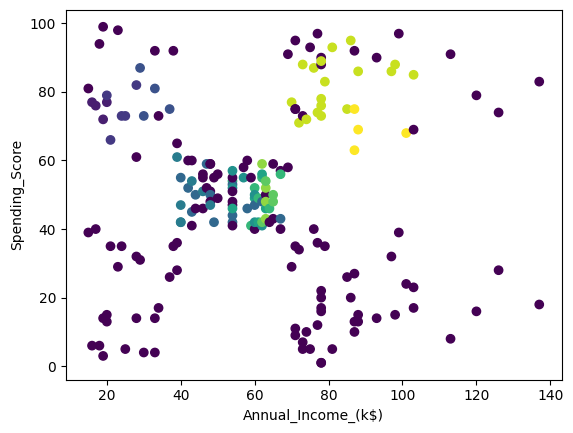

In [ ]:
plt.scatter(x,y,c=db.labels_)
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()